In [43]:
import pandas as pd
import miceforest as mf
from sklearn.preprocessing import LabelEncoder

In [2]:
bbpdata = pd.read_csv("../Downloads/table_tabel-68f189ce-1767-4eed-9368-34d5efa455a6.csv")
inflatiedata = pd.read_csv("../Downloads/CPI__prijsindex_2015_100_17112022_134353.csv", sep = ';')
unemploymentdata = pd.read_csv("../Downloads/Arbeidsdeelname__kerncijfers_17112022_144331.csv", sep = ';')
df = pd.read_csv("../Downloads/finaldataset_for_val.csv")

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

# Prepare inflation, gdp and unemployment columns

__inflation__

In [6]:
inflatiedata = inflatiedata.drop(['Bestedingscategorieën'], axis=1)

In [7]:
inflatiedata

,Perioden,CPI (2015 = 100)
0,2002,80.74
1,2003,82.43
2,2004,83.48
3,2005,84.88
4,2006,85.82
5,2007,87.20
6,2008,89.37
7,2009,90.44
8,2010,91.59
9,2011,93.73


In [8]:
inflation_21 = inflatiedata['CPI (2015 = 100)'][19] - inflatiedata['CPI (2015 = 100)'][16]
inflation_17 = inflatiedata['CPI (2015 = 100)'][15] - inflatiedata['CPI (2015 = 100)'][11]
inflation_12 = inflatiedata['CPI (2015 = 100)'][10] - inflatiedata['CPI (2015 = 100)'][9]
inflation_10 = inflatiedata['CPI (2015 = 100)'][8] - inflatiedata['CPI (2015 = 100)'][5]
inflation_6 = inflatiedata['CPI (2015 = 100)'][4] - inflatiedata['CPI (2015 = 100)'][1]

In [9]:
def valence_inflation (row):
    if row['date'] == 202107. :
        return inflation_21
    if row['date'] == 202106 :
        return inflation_21
    if row['date'] == 201906 :
        return inflation_17
    if row['date'] == 201907:
        return inflation_17
    if row['date']  == 201207:
        return inflation_12
    if row['date'] == 201206:
        return inflation_12
    if row['date'] == 201006:
        return inflation_10
    if row['date'] == 201007:
        return inflation_10
    if row['date'] == 200806:
        return inflation_6
    if row['date'] == 200809:
        return inflation_6
    return 0

__BBP__

In [10]:
bbpdata = bbpdata.replace(',','.', regex=True)

In [11]:
bbpdata['Verandering (%-verandering t.o.v. jaar eerder)'] = bbpdata['Verandering (%-verandering t.o.v. jaar eerder)'].astype(float)

In [12]:
bbpdata

,Perioden,Verandering (%-verandering t.o.v. jaar eerder)
0,2000,4.2
1,2001,2.3
2,2002,0.2
3,2003,0.2
4,2004,2.0
5,2005,2.1
6,2006,3.5
7,2007,3.8
8,2008,2.2
9,2009,-3.7


In [13]:
gdp_2002 = ((100+(0.002*100)))
gdp_2003 = ((gdp_2002+(0.002*gdp_2002)))
gdp_2004 = ((gdp_2003+(0.02*gdp_2003)))
gdp_2005 = ((gdp_2004+(0.021*gdp_2004)))
gdp_2006 = ((gdp_2005+(0.035*gdp_2005)))
gdp_2007 = ((gdp_2006+(0.038*gdp_2006)))
gdp_2008 = ((gdp_2007+(0.022*gdp_2007)))
gdp_2009 = ((gdp_2008-(0.037*gdp_2008)))
gdp_2010 = ((gdp_2009+(0.013*gdp_2009)))
gdp_2011 = ((gdp_2010+(0.016*gdp_2010)))
gdp_2012 = ((gdp_2011-(0.01*gdp_2011)))
gdp_2013 = ((gdp_2012-(0.001*gdp_2012)))
gdp_2014 = ((gdp_2013+(0.014*gdp_2013)))
gdp_2015 = ((gdp_2014+(0.02*gdp_2014)))
gdp_2016 = ((gdp_2015+(0.022*gdp_2015)))
gdp_2017 = ((gdp_2016+(0.029*gdp_2016)))
gdp_2018 = ((gdp_2017+(0.024*gdp_2017)))
gdp_2019 = ((gdp_2018+(0.02*gdp_2018)))
gdp_2020 = ((gdp_2019-(0.038*gdp_2019)))
gdp_2021 = ((gdp_2020+(0.048*gdp_2020)))

In [14]:
def valence_gdp (row):
    if row['date'] == 202107. :
        return 100*((gdp_2021-gdp_2017)/gdp_2017)
    if row['date'] == 202106 :
        return 100*((gdp_2021-gdp_2017)/gdp_2017)
    if row['date'] == 201906 :
        return 100*((gdp_2017-gdp_2012)/gdp_2012)
    if row['date'] == 201907:
        return 100*((gdp_2017-gdp_2012)/gdp_2012)
    if row['date']  == 201207:
        return 100*((gdp_2012-gdp_2010)/gdp_2010)
    if row['date'] == 201206:
        return 100*((gdp_2012-gdp_2010)/gdp_2010)
    if row['date'] == 201006:
        return 100*((gdp_2010-gdp_2006)/gdp_2006)
    if row['date'] == 201007:
        return 100*((gdp_2010-gdp_2006)/gdp_2006)
    if row['date'] == 200806:
        return 100*((gdp_2006-gdp_2002)/gdp_2002)
    if row['date'] == 200809:
        return 100*((gdp_2006-gdp_2002)/gdp_2002)
    return 0

__unemployment__

In [15]:
unemploymentdata

,Geslacht,Leeftijd,Hoogst behaald onderwijsniveau,Perioden,Netto arbeidsparticipatie (%)
0,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2003,64.2
1,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2004,63.8
2,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2005,64.1
3,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2006,65.0
4,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2007,66.6
5,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2008,67.9
6,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2009,67.6
7,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2010,66.7
8,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2011,66.5
9,Totaal mannen en vrouwen,15 tot 75 jaar,Totaal,2012,66.4


In [16]:
unemploymentdata = unemploymentdata.drop(['Geslacht', 'Leeftijd', 'Hoogst behaald onderwijsniveau'], axis=1)

In [17]:
unemploymentdata

,Perioden,Netto arbeidsparticipatie (%)
0,2003,64.2
1,2004,63.8
2,2005,64.1
3,2006,65.0
4,2007,66.6
5,2008,67.9
6,2009,67.6
7,2010,66.7
8,2011,66.5
9,2012,66.4


In [18]:
unemployment_21 = unemploymentdata['Netto arbeidsparticipatie (%)'][22] - unemploymentdata['Netto arbeidsparticipatie (%)'][14]
unemployment_17 = unemploymentdata['Netto arbeidsparticipatie (%)'][14] - unemploymentdata['Netto arbeidsparticipatie (%)'][9]
unemployment_12 = unemploymentdata['Netto arbeidsparticipatie (%)'][9] - unemploymentdata['Netto arbeidsparticipatie (%)'][7]
unemployment_10 = unemploymentdata['Netto arbeidsparticipatie (%)'][7] - unemploymentdata['Netto arbeidsparticipatie (%)'][3]
unemployment_6 = unemploymentdata['Netto arbeidsparticipatie (%)'][3] - unemploymentdata['Netto arbeidsparticipatie (%)'][1]

In [19]:
def valence_unemployment (row):
    if row['date'] == 202107. :
        return unemployment_21
    if row['date'] == 202106 :
        return unemployment_21
    if row['date'] == 201906 :
        return unemployment_17
    if row['date'] == 201907:
        return unemployment_17
    if row['date']  == 201207:
        return unemployment_12
    if row['date'] == 201206:
        return unemployment_12
    if row['date'] == 201006:
        return unemployment_10
    if row['date'] == 201007:
        return unemployment_10
    if row['date'] == 200806:
        return unemployment_6
    if row['date'] == 200809:
        return unemployment_6
    return 0

__Apply formulas to columns__

In [20]:
df['GDP'] = df.apply (lambda row: valence_gdp(row), axis=1)
df['inflation'] = df.apply (lambda row: valence_inflation(row), axis=1)
df['unemployment'] = df.apply (lambda row: valence_unemployment(row), axis=1)

__Change order of columns__

In [21]:
my_list = list(df)

In [ ]:
print(my_list)

In [23]:
df = df.loc[:, ['date', 'sex', 'age', 'satisfaction_individual', 'satisfaction_individual_2', 'satisfaction_national', 'satisfaction_national_2', 'income', 'income_2', 'entrepreneur_freelancer', 'entrepreneur_freelancer_2', 'entrepreneur_freelancer_alongside', 'entrepreneur_freelancer_alongside_2', 'one_person_business', 'one_person_business_2', 'company_owner', 'company_owner_2', 'partnership', 'partnership_2', 'partner_partnership', 'partner_partnership_2', 'private_limited_liability_company', 'private_limited_liability_company_2', 'other', 'other_2', 'none_work_situation', 'none_work_situation_2', 'zorgtoeslag', 'zorgtoeslag_2', 'Ziektewetuitkering', 'Ziektewetuitkering_2', 'ANW', 'ANW_2', 'nabestaandenpensioen', 'nabestaandenpensioen_2', 'bijstand', 'bijstand_2', 'bijstand_zelfstandigen', 'bijstand_zelfstandigen_2', 'IOAWIOAZ', 'IOAWIOAZ_2', 'WGA', 'WGA_2', 'invadility_pension', 'invadility_pension_2', 'kinderbijslag', 'kinderbijslag_2', 'none_benefit', 'none_benefit_2', 'income_realestate', 'income_realestate_2', 'student_grant', 'student_grant_2', 'student_loan', 'student_loan_2', 'alimony_ex', 'alimony_ex_2', 'alimony_children', 'alimony_children_2', 'study_allowance_parents', 'study_allowance_parents_2', 'allowence_family', 'allowence_family_2', 'dividend_stock_investment', 'dividend_stock_investment_2', 'interests', 'interests_2', 'none_sources', 'none_sources_2', 'interest_loans', 'interest_loans_2', 'support_gift_paid', 'support_gift_paid_2', 'taxable_income', 'taxable_income_2', 'net_income_household', 'net_income_household_2', 'financial_situation_grade', 'financial_situation_grade_2', 'difficulty_life_grade', 'difficulty_life_grade_2', 'financial_situation_category', 'financial_situation_category_2', 'household_expenditure', 'household_expenditure_2', 'big_purchase', 'big_purchase_2', 'financial_situation_future', 'financial_situation_future_2', 'no_arrears', 'no_arrears_2', 'rent_mortgage_arrears', 'rent_mortgage_arrears_2', 'general_utilities_arrear', 'general_utilities_arrear_2', 'other_arrears', 'other_arrears_2', 'months_arrears_rent', 'months_arrears_rent_2', 'months_arrears_general_utilities', 'months_arrears_general_utilities_2', 'GDP', 'inflation', 'unemployment', 'partyvote']]


&nbsp;

# Transforming variables to category

In [25]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [41]:
ordinal_columns = ['satisfaction_individual', 'satisfaction_national', 
                   'financial_situation_category', 'financial_situation_grade',
                   'financial_situation_future', 'difficulty_life_grade', 'household_expenditure']

In [26]:
for col in df.columns:
    for i in category_columns:
        if col == i:
            df[col] = df[col].astype('category')

In [27]:
df.dtypes

date                                   float64
sex                                   category
age                                    float64
satisfaction_individual                float64
satisfaction_individual_2             category
                                        ...   
months_arrears_general_utilities_2    category
GDP                                    float64
inflation                              float64
unemployment                           float64
partyvote                             category
Length: 105, dtype: object

&nbsp;

# Multiple Imputation with MICE

In [28]:
print(df.isna().sum().sum())

51966


__add column full of 0, to solve indexrange error__

In [29]:
df.loc[len(df)] = 0

__making kernel__

In [31]:
kernel_imp = mf.ImputationKernel(
    data=df,
    datasets=4,
    save_all_iterations=True,
    random_state=2017)

__imputation__

In [32]:
kernel_imp.mice(3,verbose=True)

Initialized logger with name mice 1-3
Dataset 0
1  | age | income | partnership | one_person_business | partner_partnership | entrepreneur_freelancer_alongside | private_limited_liability_company | company_owner | entrepreneur_freelancer | other | none_work_situation | kinderbijslag | WGA | invadility_pension | Ziektewetuitkering | bijstand | ANW | nabestaandenpensioen | zorgtoeslag | none_benefit | bijstand_zelfstandigen | student_grant | study_allowance_parents | student_loan | income_realestate | none_sources | interests | dividend_stock_investment | alimony_ex | allowence_family | alimony_children | interest_loans | support_gift_paid | satisfaction_individual | satisfaction_national | financial_situation_grade | difficulty_life_grade | financial_situation_category | big_purchase | household_expenditure | rent_mortgage_arrears | no_arrears | general_utilities_arrear | other_arrears | months_arrears_general_utilities | months_arrears_rent | financial_situation_future | IOAWIOAZ | tax

In [33]:
print(kernel_imp)


              Class: ImputationKernel
           Datasets: 4
         Iterations: 3
       Data Samples: 18918
       Data Columns: 105
  Imputed Variables: 50
save_all_iterations: True


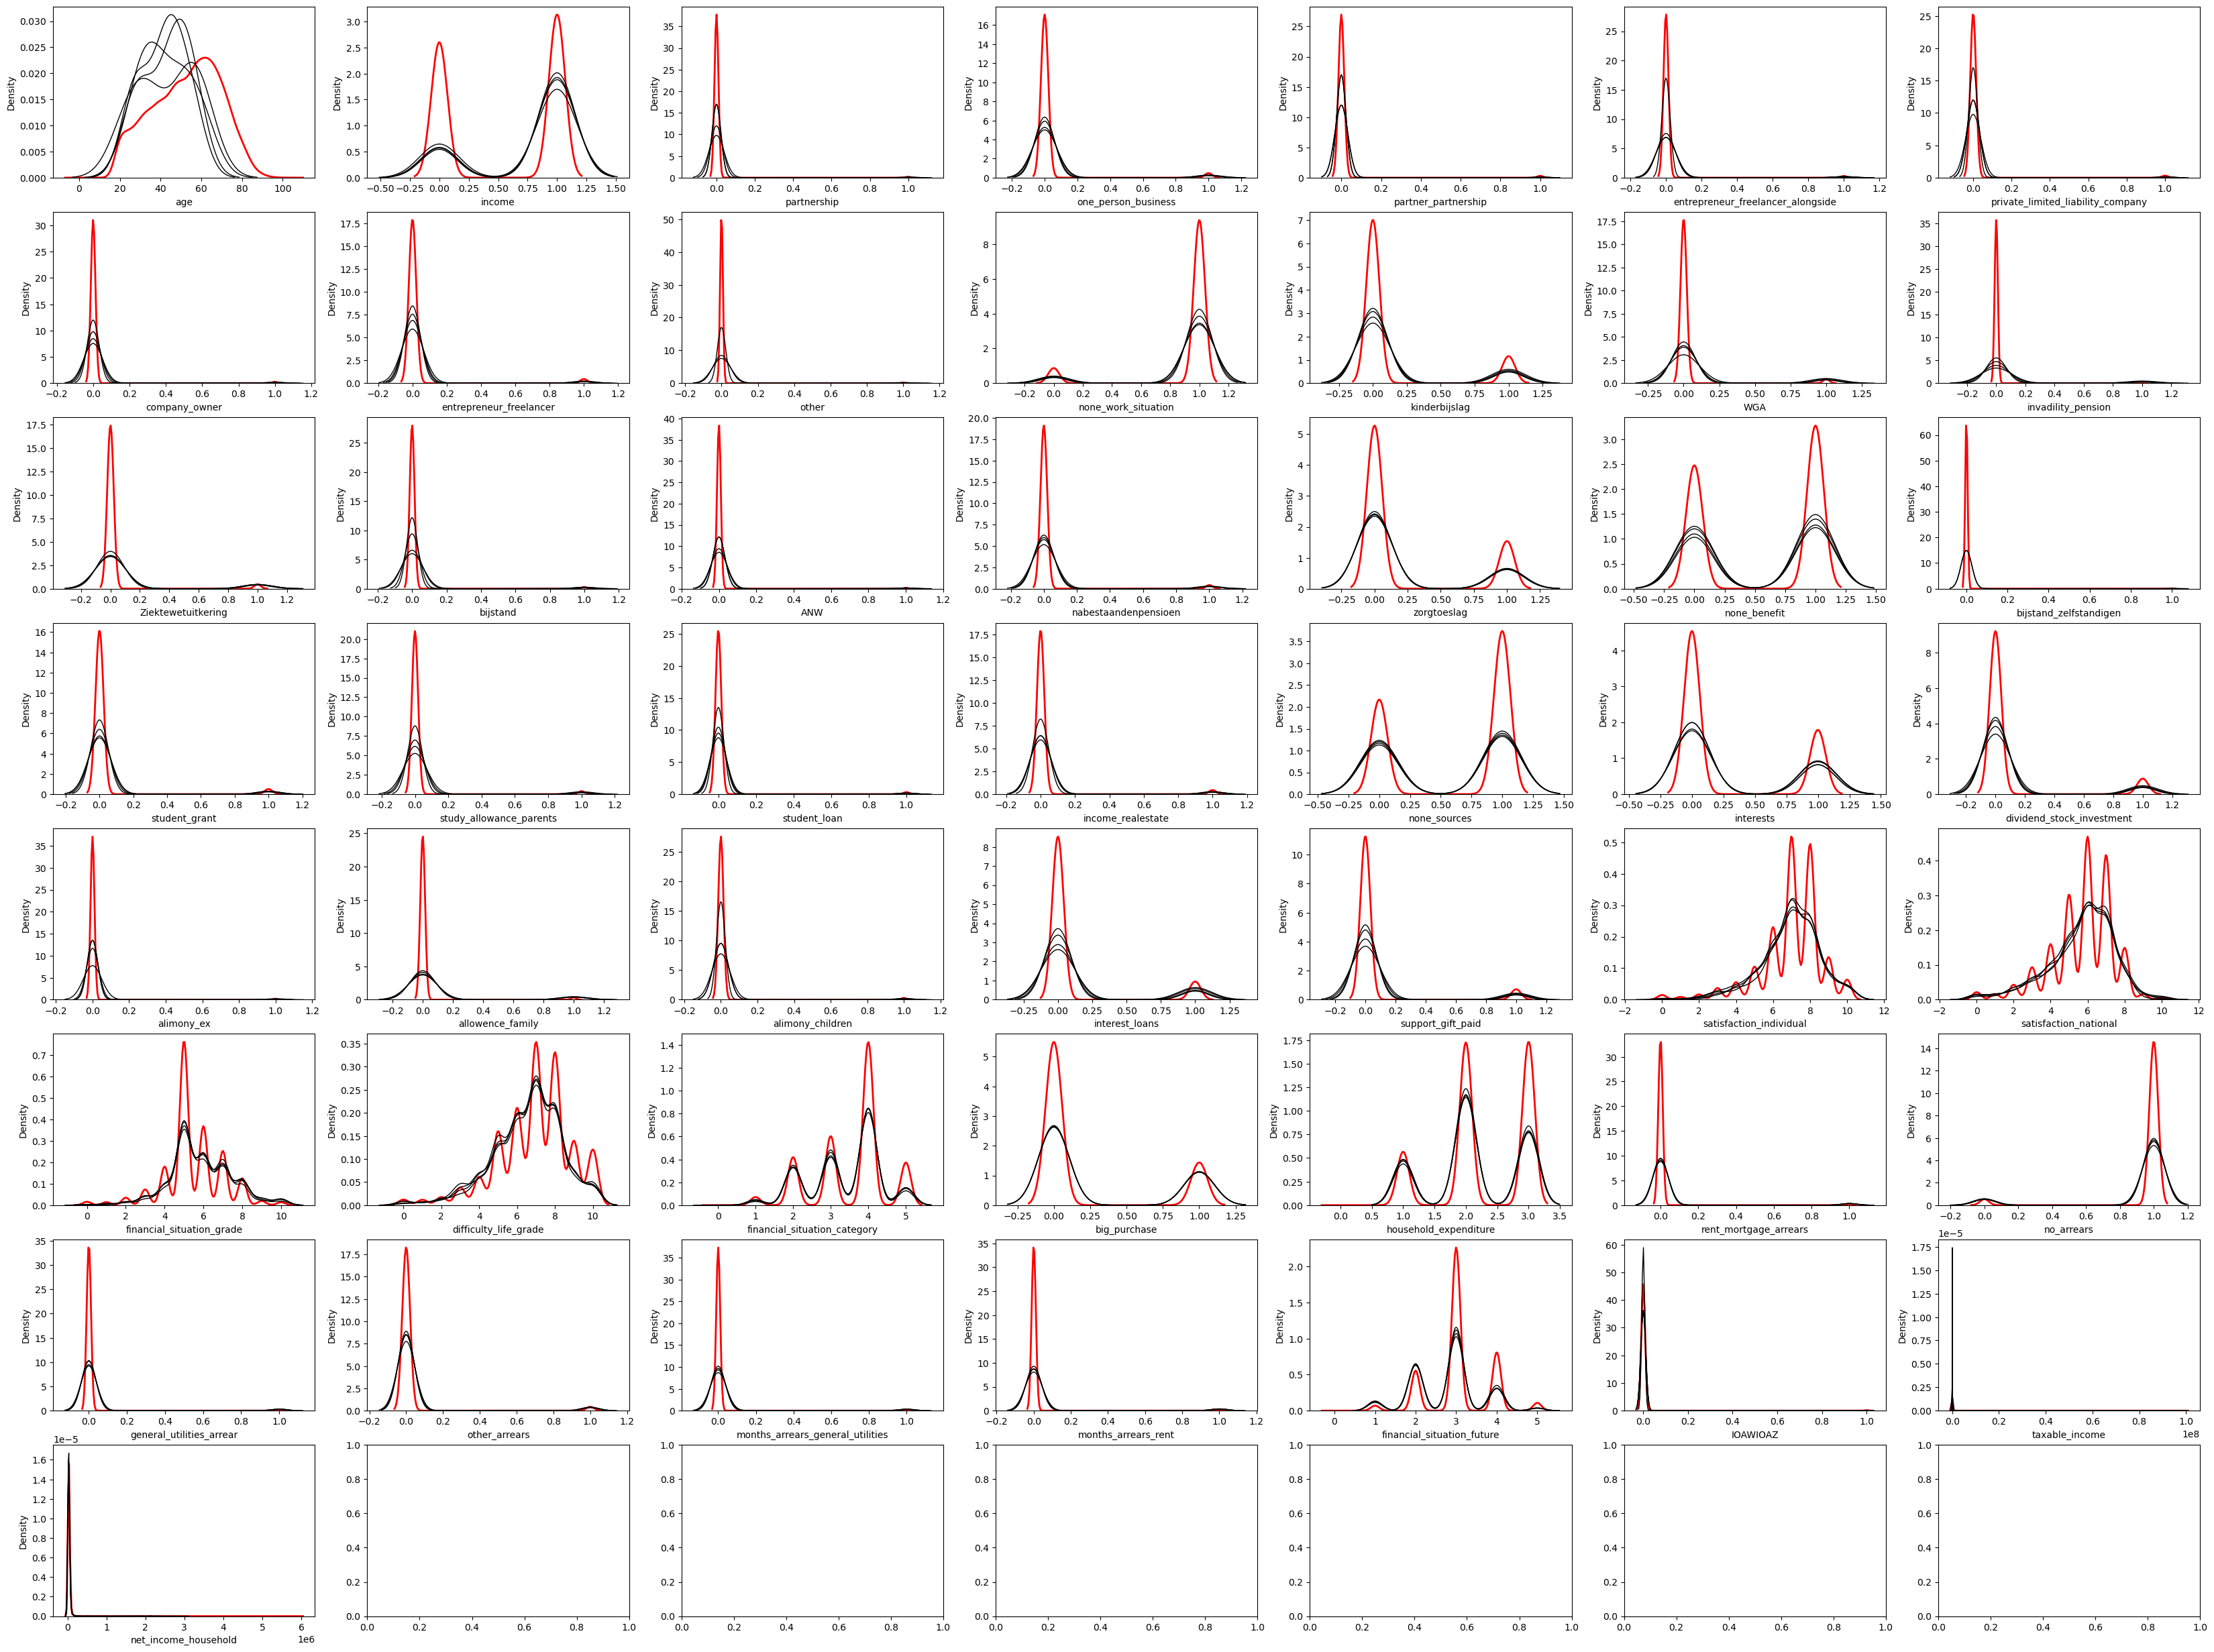

In [34]:
kernel_imp.plot_imputed_distributions(wspace=0.2,hspace=0.2, left=30, right=35, bottom=30, top=35)

__impute values in existing dataset__

In [35]:
new_data = kernel_imp.impute_new_data(df)

In [36]:
df = new_data.complete_data(0)

In [37]:
print(df.isna().sum().sum())

0


In [38]:
df = df[:-1]

&nbsp;

# Transforming variables to correct dtype after imputation

__category__

In [44]:
for col in df.columns:
    for i in category_columns:
        if col == i:
            df[col] = df[col].astype('category')

__ordinal__

In [45]:
for col in df.columns:
    for i in ordinal_columns:
        if col == i:
            df[col] = LabelEncoder().fit_transform(df[col])

# Transforming encoded target variable to strings

In [46]:
df['partyvote'] = df['partyvote'].replace([9, 2, 4, 0, 8, 5, 3, 6, 1, 11, 7, 10],  
                                          ['VVD', 'D66', 'PVV', 'CDA', 'SP',
                                           'PvdA', 'GL', 'PvdD', 'CU', 'other',
                                           'SGP', 'blank'])

&nbsp;

# Save cleaned dataset

In [47]:
df.to_csv('finaldataset_val.csv')